<a href="https://colab.research.google.com/github/jadhavramdas/PRODIGY-DataScience/blob/main/Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [73]:
df_original = pd.read_csv('/content/AviationData.csv', encoding='mac_roman')

<ipython-input-73-b5de1c24cbe4>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/AviationData.csv', encoding='mac_roman')


In [74]:
# List of data's columns
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [75]:
# Summary statistics of numeric columns
df.describe()


,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,7,7,24407,24582,24555,24550,24605
mean,41,-105,1,0,0,0,4
std,6,35,0,4,1,2,24
min,31,-173,0,0,0,0,0
25%,38,-117,1,0,0,0,0
50%,42,-88,1,0,0,0,1
75%,46,-84,1,0,0,0,2
max,48,-71,4,270,47,125,588


In [76]:
# Let's have a look at our data again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24693 entries, 0 to 24692
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                24693 non-null  object 
 1   Investigation.Type      24693 non-null  object 
 2   Accident.Number         24693 non-null  object 
 3   Event.Date              24693 non-null  object 
 4   Location                24686 non-null  object 
 5   Country                 24579 non-null  object 
 6   Latitude                7 non-null      float64
 7   Longitude               7 non-null      float64
 8   Airport.Code            12915 non-null  object 
 9   Airport.Name            14693 non-null  object 
 10  Injury.Severity         24693 non-null  object 
 11  Aircraft.damage         24142 non-null  object 
 12  Aircraft.Category       3627 non-null   object 
 13  Registration.Number     24688 non-null  object 
 14  Make                    24687 non-null

In [77]:
# Checking the number of missing values in each column
df.isna().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      7
Country                     114
Latitude                  24686
Longitude                 24686
Airport.Code              11778
Airport.Name              10000
Injury.Severity               0
Aircraft.damage             551
Aircraft.Category         21066
Registration.Number           5
Make                          6
Model                        17
Amateur.Built                 1
Number.of.Engines           286
Engine.Type                   4
FAR.Description           21066
Schedule                  20640
Purpose.of.flight            34
Air.carrier               23434
Total.Fatal.Injuries        111
Total.Serious.Injuries      138
Total.Minor.Injuries        143
Total.Uninjured              88
Weather.Condition             2
Broad.phase.of.flight       130
Report.Status                 0
Publication.Date          12444
dtype: i

In [78]:
# I am going to drop columns that have roughly more than 25% of their data missing
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight']

df_clean = df.drop(columns=columns_to_drop)


In [79]:
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

In [80]:
# I change some column titles to more managable ones
new_column_names = {'vent.Id': 'ID', 'Investigation.Type': 'Type', 'Event.Date':'Date', 'Injury.Severity':'Injury_Severity',
                    'Aircraft.damage':'Damage_type', 'Number.of.Engines':'Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df_clean.rename(columns=new_column_names, inplace=True)

In [81]:
df_clean.head(1)

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Registration.Number,Make,...,Engines,Engine.Type,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1,Reciprocating,Personal,2,0,0,0,UNK,Probable Cause,NaN


In [82]:
df_clean['Fatality'] = df_clean['Injury_Severity'].str.extract(r'\((\d+)\)')
df_clean['Fatality'].fillna(df_clean['Injury_Severity'], inplace=True)
df_clean['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True)
df_clean['Fatality'] = df_clean.apply(lambda row: row['Fatal_Injuries'] if row['Fatality'] == 'Fatal' else row['Fatality'], axis=1)
df_clean['Fatality'].replace('Unavailable', np.nan, inplace=True)
df_clean['Fatality'][~df_clean['Fatality'].isna()] = df_clean['Fatality'][~df_clean['Fatality'].isna()].astype(int)
pd.options.display.float_format = '{:.0f}'.format


<ipython-input-82-05ad8c9cf8bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatality'][~df_clean['Fatality'].isna()] = df_clean['Fatality'][~df_clean['Fatality'].isna()].astype(int)


In [83]:
# My Fatality column with more accurate representation of Fatality counts has been created
df_clean['Fatality'].value_counts()


Fatality
0.0      20130
1.0       2222
2.0       1370
3.0        423
4.0        337
5.0         67
6.0         61
8.0         16
7.0         16
10.0         7
9.0          5
17.0         3
14.0         3
11.0         2
25.0         2
82.0         2
12.0         2
28.0         1
111.0        1
144.0        1
270.0        1
15.0         1
43.0         1
18.0         1
131.0        1
174.0        1
13.0         1
156.0        1
256.0        1
31.0         1
135.0        1
70.0         1
29.0         1
23.0         1
153.0        1
78.0         1
20.0         1
Name: count, dtype: int64

In [84]:
df_clean.drop(columns=['Fatal_Injuries'], inplace=True)

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24693 entries, 0 to 24692
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Event.Id             24693 non-null  object 
 1   Type                 24693 non-null  object 
 2   Accident.Number      24693 non-null  object 
 3   Date                 24693 non-null  object 
 4   Location             24686 non-null  object 
 5   Country              24579 non-null  object 
 6   Injury_Severity      24693 non-null  object 
 7   Damage_type          24142 non-null  object 
 8   Registration.Number  24688 non-null  object 
 9   Make                 24687 non-null  object 
 10  Model                24676 non-null  object 
 11  Amateur.Built        24692 non-null  object 
 12  Engines              24407 non-null  float64
 13  Engine.Type          24689 non-null  object 
 14  Flight_Purpose       24659 non-null  object 
 15  Serious_Injuries     24555 non-null 

In [86]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')
df_clean['Month'] = df_clean['Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df_clean['Season'] = df_clean['Month'].map(seasons)

In [87]:
df_clean['Year'] = df_clean['Date'].dt.year

In [88]:
df_clean['Country'].value_counts()

Country
United States               24351
Puerto Rico                    41
Bahamas                        40
ATLANTIC OCEAN                 25
Mexico                         17
GULF OF MEXICO                 16
MISSING                        11
HIGH ISLAND                     7
PACIFIC OCEAN                   6
Canada                          5
Turks And Caicos Islands        4
Netherlands Antilles            4
West Indies                     3
Germany                         3
American Samoa                  2
Australia                       2
Panama                          2
United Kingdom                  2
Colombia                        2
Japan                           2
CARIBBEAN SEA                   2
Angola                          2
Guam                            2
Iceland                         2
Costa Rica                      2
Pakistan                        1
Mozambique                      1
Malaysia                        1
Portugal                        1
Hong K

In [89]:
df_us = df_us = df_clean[df_clean['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [90]:
df_us = df_us.copy()

In [91]:
valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in valid_state_codes:
            return location[:-3].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Some accidents have not happend in a particular state
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(extract_city_state).apply(pd.Series)

In [92]:
df_us['City'] = df_us['City'].str.rstrip(',')

In [93]:
df_us.drop(columns=['Date', 'Location'], inplace=True)

In [94]:
df_us['Fatality'] = pd.to_numeric(df_us['Fatality'], errors='coerce')

In [95]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24351 entries, 0 to 24350
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Event.Id             24351 non-null  object 
 1   Type                 24351 non-null  object 
 2   Accident.Number      24351 non-null  object 
 3   Country              24351 non-null  object 
 4   Injury_Severity      24351 non-null  object 
 5   Damage_type          23838 non-null  object 
 6   Registration.Number  24351 non-null  object 
 7   Make                 24345 non-null  object 
 8   Model                24334 non-null  object 
 9   Amateur.Built        24350 non-null  object 
 10  Engines              24067 non-null  float64
 11  Engine.Type          24348 non-null  object 
 12  Flight_Purpose       24323 non-null  object 
 13  Serious_Injuries     24230 non-null  float64
 14  Minor_Injuries       24225 non-null  float64
 15  Uninjured            24275 non-null 

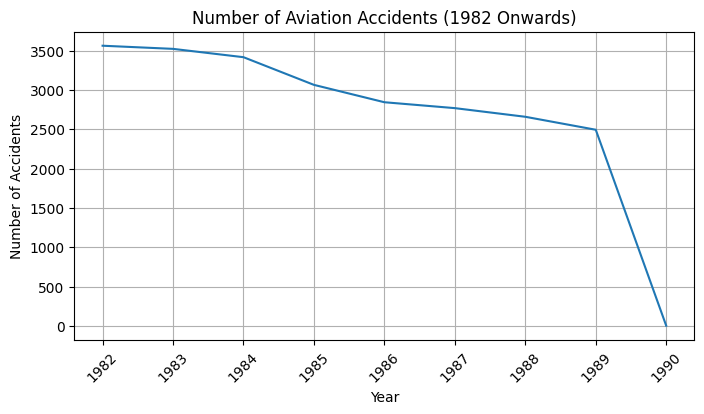

In [96]:
df_us_filtered = df_us[df_us['Year'] >= 1982]

accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1982 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-97-84cea867d555>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis', len(top_10_states))


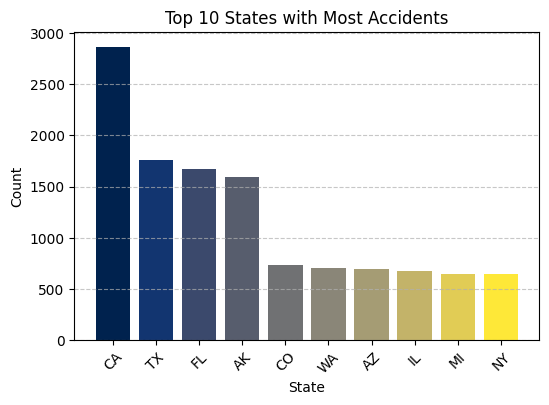

In [97]:
top_10_states = df_us['State'].value_counts().head(10)


cmap = cm.get_cmap('cividis', len(top_10_states))
colors = cmap(range(len(top_10_states)))


plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values, color=colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-98-6a16783bbba4>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis', len(top_10_states))


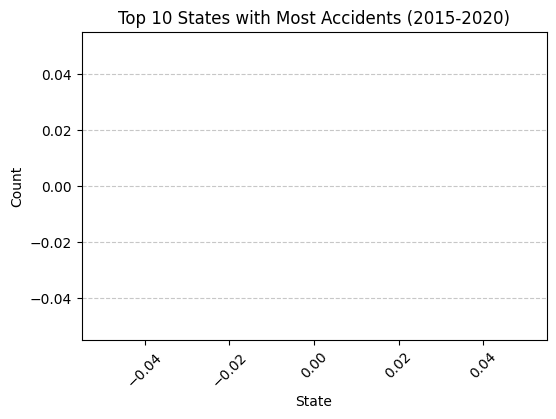

In [98]:
filtered_years = df_us[(df_us['Year'] >= 2015) & (df_us['Year'] <= 2020)]


top_10_states = filtered_years['State'].value_counts().head(10)


cmap = cm.get_cmap('cividis', len(top_10_states))
colors = cmap(np.arange(len(top_10_states)))


plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values, color=colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents (2015-2020)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [99]:
state_counts = df_us['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

import plotly.express as px
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="Distribution of Aviation Accidents Around the US",
    color_continuous_scale= 'Reds',
)


fig.show()

<ipython-input-100-2f3a3c7be152>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




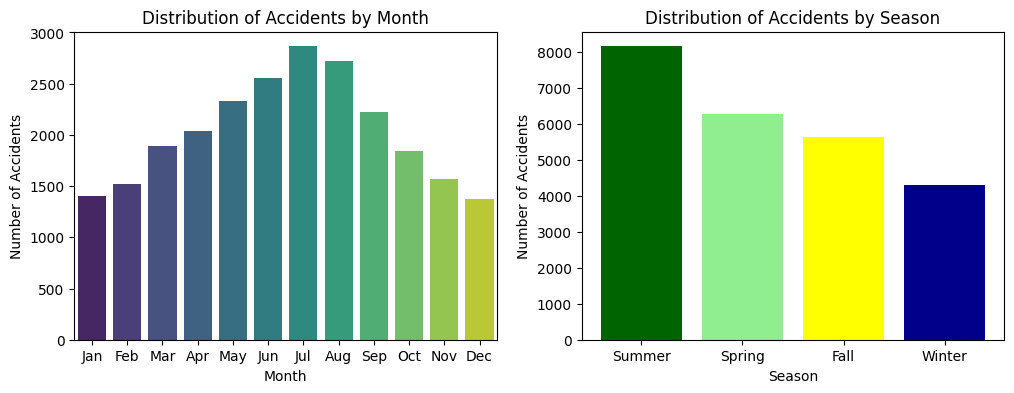

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=df_us, x='Month', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'darkblue',
    'Spring': 'lightgreen',
    'Summer': 'darkgreen',
    'Fall': 'yellow'
}


seasonal_accident_counts = df_us['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'gray') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

<ipython-input-104-f4210155c840>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




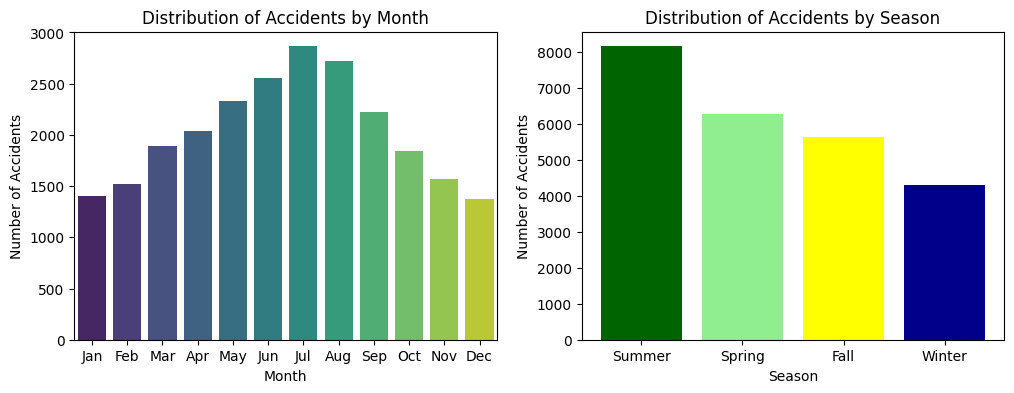

Highest_percentage of fatalities (1982 onwards): 0.00%


In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=df_us, x='Month', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'darkblue',
    'Spring': 'lightgreen',
    'Summer': 'darkgreen',
    'Fall': 'yellow'
}


seasonal_accident_counts = df_us['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'gray') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

# You need to calculate or define 'highest_percentage' before printing it.
# For example, if you have a way to calculate it, you would do:
# highest_percentage = calculate_highest_percentage(df_us)
# and then print it.
# For now, I am setting it to 0 so the code runs.
highest_percentage = 0
print(f"Highest_percentage of fatalities (1982 onwards): {highest_percentage:.2f}%")

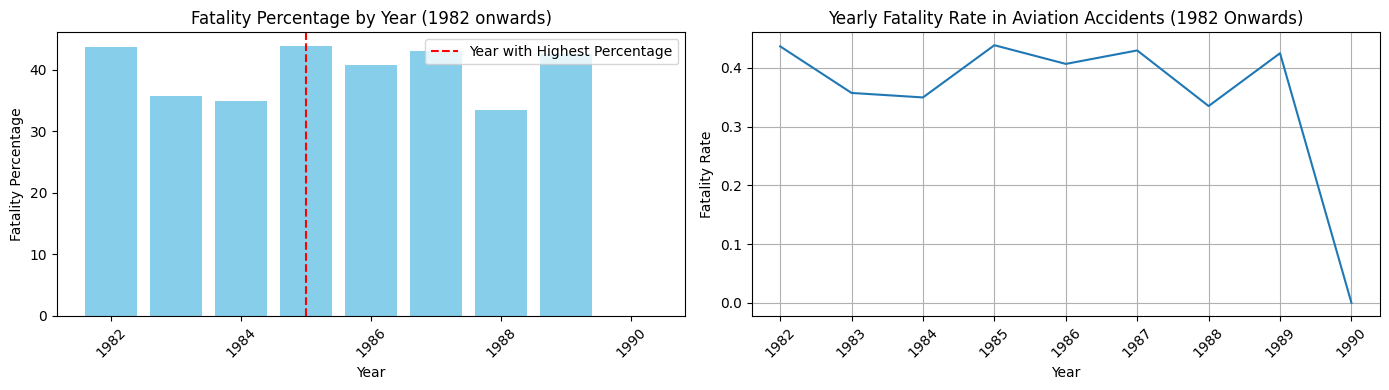

In [107]:
# Assuming 'yearly_stats_filtered' is calculated from 'df_us_filtered'
# You'll need to fill in the actual calculation based on your needs
yearly_stats_filtered = df_us_filtered.groupby('Year').agg({'Fatality': ['sum', 'count']})
yearly_stats_filtered['Fatality_Percentage'] = (yearly_stats_filtered['Fatality']['sum'] / yearly_stats_filtered['Fatality']['count']) * 100

# Calculate year with the highest fatality percentage
year_with_highest_percentage = yearly_stats_filtered['Fatality_Percentage'].idxmax()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Now you can use the calculated 'yearly_stats_filtered'
ax1.bar(yearly_stats_filtered.index, yearly_stats_filtered['Fatality_Percentage'], color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fatality Percentage')
ax1.set_title('Fatality Percentage by Year (1982 onwards)')

# Use the calculated 'year_with_highest_percentage'
ax1.axvline(x=year_with_highest_percentage, color='red', linestyle='--', label='Year with Highest Percentage')
ax1.legend()

yearly_fatality_rate = df_us_filtered.groupby('Year')['Fatality'].sum() / df_us_filtered.groupby('Year')['Fatality'].count()
ax2.plot(yearly_fatality_rate.index, yearly_fatality_rate, linestyle='-')
ax2.set_title('Yearly Fatality Rate in Aviation Accidents (1982 Onwards)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fatality Rate')
ax2.grid(True)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

In [108]:
def categorize_injury_severity(severity):
    if pd.isna(severity):
        return severity
    elif "Non-Fatal" in severity:
        return "Non-Fatal"
    elif "Fatal" in severity or "Serious" in severity:
        return "Fatal/Serious"
    elif "Minor" in severity or "Incident" in severity:
        return "Minor"
    else:
        return severity


df_us['Category'] = df_us['Injury_Severity'].apply(categorize_injury_severity)

In [109]:
df_us['Category'] = df_us['Category'].replace("Unavailable", np.nan)

In [110]:
df_us.rename(columns={'Category': 'Severity_Category'}, inplace=True)

In [111]:
df_us['Severity_Category'] = df_us['Severity_Category'].replace("Non-Fatal", "Minor")

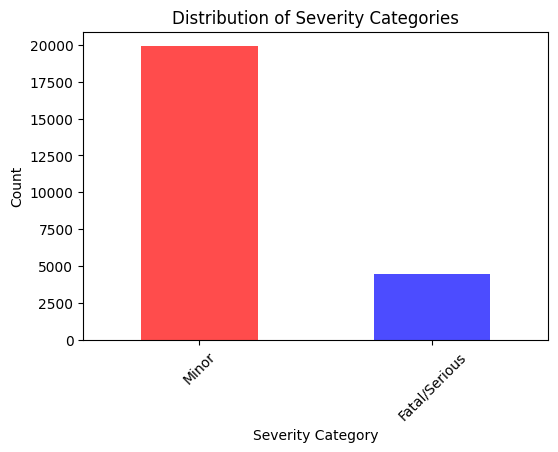

In [112]:
severity_counts = df_us['Severity_Category'].value_counts()


plt.figure(figsize=(6, 4))
severity_counts.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Distribution of Severity Categories')
plt.xlabel('Severity Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

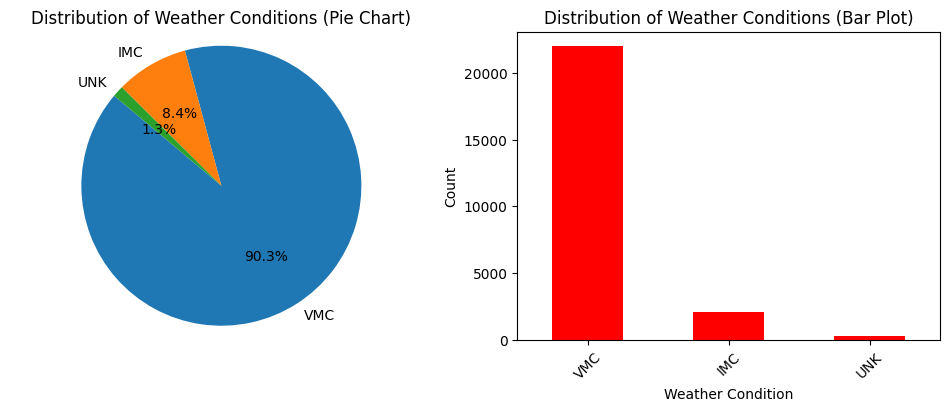

In [113]:
df_us['Weather'] = df_us['Weather'].str.upper()


weather_counts_updated = df_us['Weather'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].pie(weather_counts_updated, labels=weather_counts_updated.index,autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Weather Conditions (Pie Chart)')
axes[0].axis('equal')



weather_counts_updated.plot(kind='bar', color='red', ax=axes[1])
axes[1].set_title('Distribution of Weather Conditions (Bar Plot)')
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

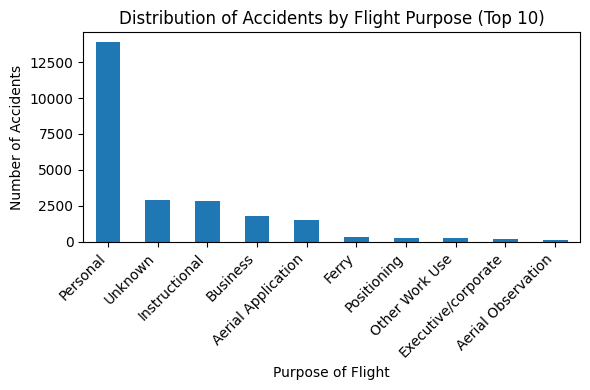

In [114]:
top_10_purposes = df_us['Flight_Purpose'].value_counts().nlargest(10).sort_values(ascending=False)


plt.figure(figsize=(6, 4))
top_10_purposes.plot(kind='bar')
plt.title('Distribution of Accidents by Flight Purpose (Top 10)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [117]:
filtered_years = df_us[(df_us['Year'] >= 2015) & (df_us['Year'] <= 2020)]

# Check if the DataFrame is empty and handle it
if filtered_years.empty:
    print("No data available for the selected years.")
else:
    purpose_counts = filtered_years['Flight_Purpose'].value_counts()
    top_ten_purposes = purpose_counts.head(10)

    colors = plt.cm.viridis(np.linspace(0, 1, len(top_ten_purposes)))

    plt.figure(figsize=(6, 4))
    top_ten_purposes.plot(kind='bar')
    plt.title('Top Ten Accidents by Purpose of Flight (2015-2020)')
    plt.xlabel('Purpose of Flight')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

No data available for the selected years.


In [118]:
make_model_accident_counts = df_us.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
1275,Cessna,152,1057
1289,Cessna,172,511
1319,Cessna,172N,346
1254,Cessna,150,345
3633,Piper,PA-28-140,339
...,...,...,...
2117,Eagle Balloons,EAGLE C-7,1
2118,Eames,ACRO SPORT,1
2119,Earl F. Folsom,SONERAI II,1
2120,Earnst,SKYBOLT,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:378: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



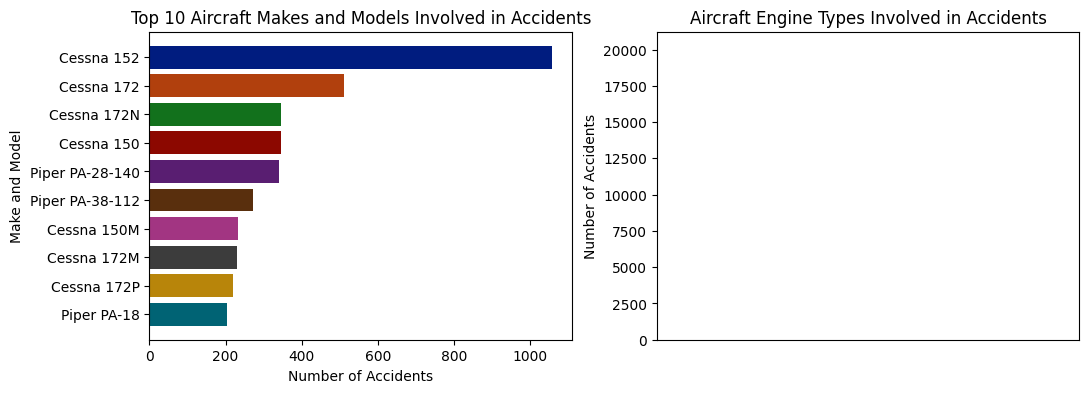

In [119]:

df_us['Engines'] = df_us['Engines'].replace(0.0, np.nan)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


top_10_make_model = make_model_accident_counts.head(10)
colors = sns.color_palette("dark", len(top_10_make_model))
axes[0].barh(top_10_make_model['Make'] + ' ' + top_10_make_model['Model'], top_10_make_model['AccidentCount'], color=colors)
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Make and Model')
axes[0].set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
axes[0].invert_yaxis()


axes[1].set_xticks([])
sns.countplot(data=df_us, x='Engines', order=df_us['Engines'].value_counts().index, ax=axes[1])
axes[1].set_title('Aircraft Engine Types Involved in Accidents')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_xlabel('Engine Type')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Engine Type')

plt.show()

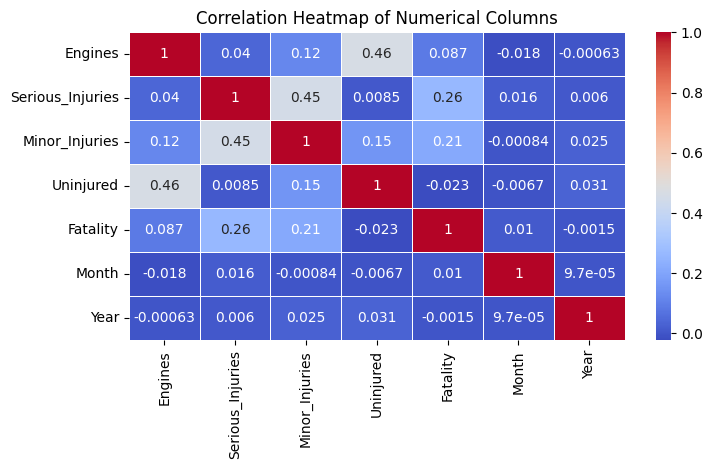

In [120]:
numerical_data = df_us.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()